# CS 439 25F DataBench Bonus Assignment

# Multi-Linear Regression Model of Student Assessment Performance Questionnaires
**by James Abello, Haoyang Zhang**

```mermaid
graph TB

subgraph Baseline_Model
    Build(Build a Multiple Linear Regression Model)
    Evaluate(Evaluate Model Performance using Adjusted R-Squared)
end

subgraph Feature_Selection
    Removal(Iterative Feature Removal and Adjusted R-Squared Calculation)
    Rank(Rank Features by Importance)
    Selection(Final Model Selection by Taking the Highest Adjusted R-Squared Model)
end

Build --> Evaluate
Evaluate --> Removal
Removal --> Rank
Rank --> Selection
Rank --> Removal
```

## Dataset Description: Student Assessment Questionnaires and Quiz Scores

The dataset `assessment_quiz_generated.csv` contains information derived from student assessment questionnaires and their corresponding quiz scores.

The dataset comprises the following attributes:

- **`timestamp`**  
  The date and time when the assessment was submitted, formatted as `yyyy-mm-dd hh:mm:ss timezone`.

- **`netid`**  
  The encoded NetID of the student. Valid NetIDs must have a string length between 8 and 14 characters (inclusive). Entries falling outside this range are considered invalid.

- **`ruid`**  
  The encoded RUID of the student. A valid RUID is expected to contain exactly 18 characters. Any deviation from this length is considered invalid.

- **Skill Proficiency Columns**  
  The following columns record students’ self-assessed proficiency levels in specific skills, rated on scales ranging from 0 up to a multiple of 5 (depending on the number of questions per topic).

  - 0: `data_structures`  
  - 1: `calculus_and_linear_algebra`  
  - 2: `probability_and_statistics`  
  - 3: `data_visualization`  
  - 4: `python_libraries`  
  - 5: `shell_scripting`  
  - 6: `sql`  
  - 7: `python_scripting`  
  - 8: `jupyter_notebook`  
  - 9: `regression`  
  - 10: `programming_languages`  
  - 11: `algorithms`  
  - 12: `complexity_measures`  
  - 13: `visualization_tools`  
  - 14: `massive_data_processing`

- **`quiz_score` (New Added column to the previous dataset)**
  The score obtained by the student in the quiz, represented as a floating-point number between 0 and 100 (inclusive).

## **Assessment Tasks**

Complete the following tasks by using the provided Jupyter Notebook Template `ME-AR.ipynb` in the [folder "Model Evaluation"](https://rutgersconnect-my.sharepoint.com/:f:/g/personal/hz333_connect_rutgers_edu/EjQo7aXXTqJJu79rqrgiJPgBli8zYMXHfoPYzvgiPaah3A).

### Part 1: Baseline Model Construction
1.  **Build a Multiple Linear Regression Model** (Task 1.1): Construct a multiple linear regression model using `train_linear_regression_model` to predict `quiz_score` using all 15 skill proficiency columns as predictor variables.
2.  **Evaluate Model Performance using Adjusted R-Squared** (Task 1.2): Evaluate the performance of the baseline model by calculating and reporting its adjusted R-squared value. The formula for adjusted R-squared is:
    $$
    \text{Adjusted } R^2 = 1 - (1 - R^2) \frac{n - 1}{n - p - 1}
    $$
    where $n$ is the number of observations and $p$ is the number of predictors.

### Part 2: Feature Importance Analysis
1.  **Iterative Feature Removal and Adjusted R-Squared Calculation** (Task 2.1): Systematically evaluate the importance of each feature by performing the following steps for each of the 15 skill proficiency columns:
    - a. Temporarily remove one feature from the dataset.
    - b. Run the linear regression model on the remaining 14 features.
    - c. Calculate the adjusted R-squared of the 14-features model.
    - d. Report the difference in adjusted R-squared compared to the adjusted R-squared of the baseline 15-features model.
2.  **Rank Features by Importance** (Task 2.2): Rank the 15 skill proficiency features from most to least important based on the magnitude of the drop in adjusted R-squared when the feature was removed. A larger drop indicates greater importance.
3.  **Final Model Selection by Taking the Highest Adjusted R-Squared Model** (Task 2.3): Based on the importance of the features, decide the number and the subset of skill proficiency features to be used in the Final Multi-Linear Regression Model.
4.  **Plot number of features used vs. the Adjusted R-Squared** (Task 2.4): Draw a line plot, the x-axis is the number of features used, and the y-axis is the Adjusted R-Squared value.

### Environment Setup and Data Loading

In [3]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [4]:
def load_data(file_path):
    """Load the dataset from a CSV file.
    IN: file_path: str, path to the CSV file
    OUT: pd.DataFrame, loaded dataset
    """
    return pd.read_csv(file_path)

In [5]:
if __name__ == "__main__":
    skill_columns = [
        'data_structures',
        'calculus_and_linear_algebra',
        'probability_and_statistics',
        'data_visualization',
        'python_libraries',
        'shell_scripting',
        'sql',
        'python_scripting',
        'jupyter_notebook',
        'regression',
        'programming_languages',
        'algorithms',
        'complexity_measures',
        'visualization_tools',
        'massive_data_processing'
    ]

    # Load the dataset
    data = load_data('assessment_quiz_generated.csv')

    display(data.describe())
    display(data.info())

,data_structures,calculus_and_linear_algebra,probability_and_statistics,data_visualization,python_libraries,shell_scripting,sql,python_scripting,jupyter_notebook,regression,programming_languages,algorithms,complexity_measures,visualization_tools,massive_data_processing,quiz_score
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,20.466667,14.323810,31.057143,22.000000,8.038095,1.257143,2.428571,1.819048,2.609524,4.066667,15.638095,12.809524,4.009524,4.066667,1.666667,59.639433
std,8.882856,4.878318,13.724507,8.212327,5.776151,1.407593,2.311581,2.111238,2.276533,3.988606,5.769822,7.898509,3.124024,5.364174,2.581989,16.499555
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.722189
25%,16.000000,11.000000,24.000000,16.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.000000,7.000000,1.000000,0.000000,0.000000,50.192769
50%,22.000000,15.000000,31.000000,22.000000,9.000000,1.000000,1.000000,1.000000,1.000000,3.000000,16.000000,13.000000,4.000000,2.000000,1.000000,60.358213
75%,26.000000,18.000000,41.000000,28.000000,12.000000,1.000000,5.000000,5.000000,5.000000,6.000000,19.000000,18.000000,6.000000,7.000000,2.000000,72.577381
max,35.000000,25.000000,55.000000,35.000000,20.000000,5.000000,5.000000,5.000000,5.000000,15.000000,28.000000,35.000000,10.000000,23.000000,12.000000,98.155000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   timestamp                    105 non-null    object 
 1   netid                        105 non-null    object 
 2   ruid                         105 non-null    object 
 3   data_structures              105 non-null    int64  
 4   calculus_and_linear_algebra  105 non-null    int64  
 5   probability_and_statistics   105 non-null    int64  
 6   data_visualization           105 non-null    int64  
 7   python_libraries             105 non-null    int64  
 8   shell_scripting              105 non-null    int64  
 9   sql                          105 non-null    int64  
 10  python_scripting             105 non-null    int64  
 11  jupyter_notebook             105 non-null    int64  
 12  regression                   105 non-null    int64  
 13  programming_language

None

### Task 1.1: Build a Muti-Linear Regression Model

In [6]:
def train_linear_regression_model(df, feature_cols, target_col):
    """Train a linear regression model.
    IN: df: pd.DataFrame, the dataset
        feature_cols: list of str, names of feature columns
        target_col: str, name of the target column
    OUT: LinearRegression, trained model
    """
    # Your code here
    X = df[feature_cols]
    y = df[target_col]

    # Initialize and fit the model
    model = LinearRegression()
    model.fit(X, y)
    return model

In [7]:
if __name__ == "__main__":
    # train the model with all features
    model = train_linear_regression_model(data, skill_columns, 'quiz_score')

### Task 1.2: Evaluate Model Performance using Adjusted R-Squared

In [ ]:
def calculate_adjusted_r_squared(model, df, feature_cols, target_col):
    """Calculate the adjusted R-squared of the model.
    IN: model: LinearRegression, trained model
        df: pd.DataFrame, the dataset
        feature_cols: list of str, names of feature columns
        target_col: str, name of the target column
    OUT: float, adjusted R-squared value
    """
    # Your code here
    X = df[feature_cols]
    y = df[target_col]
    
    # Get R-squared from the model
    r_squared = model.score(X, y)
    
    # Get number of samples (n) and predictors (p)
    n = len(y)
    p = X.shape[1]
    
    # Calculate adjusted R-squared
    adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
    return adjusted_r_squared

In [15]:
if __name__ == "__main__":
    adjusted_r2 = calculate_adjusted_r_squared(model, data, skill_columns, 'quiz_score')
    print(f'Adjusted R-squared: {adjusted_r2}')

Adjusted R-squared: 0.5308076296068789


### Task 2: Feature Importance Analysis

#### 2.1. Iterative Feature Removal and Adjusted R-Squared Calculation

In [16]:
def calculate_reduced_model_adjusted_r_squared(df, feature_cols, target_col, remove_col):
    """Calculate adjusted R-squared after removing one feature.
    IN: 
        df: pd.DataFrame, the dataset
        feature_cols: list of str, names of current feature columns
        target_col: str, name of the target column
        remove_col: str, name of the feature to remove
    OUT: 
        float, adjusted R-squared value of the reduced model
    """
    # Create reduced feature list
    reduced_features = [col for col in feature_cols if col != remove_col]

    # Prepare data
    X = df[reduced_features]
    y = df[target_col]

    # Fit reduced model
    model = LinearRegression().fit(X, y)

    # Compute R²
    r2 = model.score(X, y)

    # Compute adjusted R²
    n = len(y)
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    return adjusted_r2

In [17]:
if __name__ == "__main__":
    for col in skill_columns:
        reduced_adj_r2 = calculate_reduced_model_adjusted_r_squared(data, skill_columns, 'quiz_score', col)
        print(f'Removed {col}, Adjusted R-squared: {reduced_adj_r2}')

Removed data_structures, Adjusted R-squared: 0.533684639029099
Removed calculus_and_linear_algebra, Adjusted R-squared: 0.5171839094369506
Removed probability_and_statistics, Adjusted R-squared: 0.48761090000458307
Removed data_visualization, Adjusted R-squared: 0.500741253316957
Removed python_libraries, Adjusted R-squared: 0.5356859667004188
Removed shell_scripting, Adjusted R-squared: 0.5323024432710917
Removed sql, Adjusted R-squared: 0.5358517474021773
Removed python_scripting, Adjusted R-squared: 0.49599675509212326
Removed jupyter_notebook, Adjusted R-squared: 0.5359214738307233
Removed regression, Adjusted R-squared: 0.5106839440525476
Removed programming_languages, Adjusted R-squared: 0.5359945633832969
Removed algorithms, Adjusted R-squared: 0.5248976264163654
Removed complexity_measures, Adjusted R-squared: 0.5350053803049647
Removed visualization_tools, Adjusted R-squared: 0.5357509929424005
Removed massive_data_processing, Adjusted R-squared: 0.5353572283671284


#### 2.2. Rank Features by Importance

In [18]:
def reduce_model(df, feature_cols, target_col):
    """Remove the least important feature based on adjusted R-squared.
    IN: df: pd.DataFrame, the dataset
        feature_cols: list of str, names of current feature columns
        target_col: str, name of the target column
    OUT: remaining_cols, list of str, updated feature columns after removal
         removed_col, str, name of the removed feature
         adjusted_r2, float, adjusted R-squared of the reduced model
    """
    # Your code here
    best_adj_r2 = -float('inf')
    removed_col = None
    remaining_cols = feature_cols.copy()

    for col in feature_cols:
        adj_r2 = calculate_reduced_model_adjusted_r_squared(df, feature_cols, target_col, col)
        if adj_r2 > best_adj_r2:
            best_adj_r2 = adj_r2
            removed_col = col

    remaining_cols.remove(removed_col)

    return remaining_cols, removed_col, best_adj_r2

In [19]:
if __name__ == "__main__":
    remaining_cols, removed_col, adjusted_r2 = reduce_model(data, skill_columns, 'quiz_score')
    print(f'Removed feature: {removed_col}')
    print(f'Adjusted R-squared: {adjusted_r2}')

Removed feature: programming_languages
Adjusted R-squared: 0.5359945633832969


#### Subtask 2.3: Final Model Selection by Taking the Highest Adjusted R-Squared Model
Repeat the process of removing the least important feature (as identified in Subtask 2.2) until only one feature remains. After each removal, retrain the model and record the adjusted R-squared value.

In [ ]:
def feature_importance_ranking(df, feature_cols, target_col):
    """Iteratively remove the least important feature and rank features by importance.
    IN: df: pd.DataFrame, the dataset
        feature_cols: list of str, names of current feature columns
        target_col: str, name of the target column
    OUT: list of tuples (feature_name, adjusted_r_squared) in order of removal
    """
    ranking = []
    current_features = feature_cols.copy()

    full_model = train_linear_regression_model(df, current_features, target_col)
    full_adjusted_r2 = calculate_adjusted_r_squared(full_model, df, current_features, target_col)
    ranking.append(('Full Model', full_adjusted_r2))

    # Your code here
    while len(current_features) > 1:
        best_adj_r2 = -float('inf')
        least_important_feature = None

        for f in current_features:
            reduced_features = [x for x in current_features if x != f]
            model = train_linear_regression_model(df, reduced_features, target_col)
            adj_r2 = calculate_adjusted_r_squared(model, df, reduced_features, target_col)

            if adj_r2 > best_adj_r2:
                best_adj_r2 = adj_r2
                least_important_feature = f

        current_features.remove(least_important_feature)
        ranking.append((least_important_feature, best_adj_r2))
    ranking.append((current_features[0], 0))  

    return ranking

In [ ]:
if __name__ == "__main__":
    ranking = feature_importance_ranking(data, skill_columns, 'quiz_score')
    for idx, (feature, adj_r2) in enumerate(ranking):
        rank = len(ranking) - idx
        print(f' Rank: {rank:<2}, Adjusted R-squared: {adj_r2:<.4f}, Feature Removed: {feature}')

 Rank: 16, Adjusted R-squared: 0.5308, Feature Removed: None
 Rank: 15, Adjusted R-squared: 0.5360, Feature Removed: programming_languages
 Rank: 14, Adjusted R-squared: 0.5410, Feature Removed: jupyter_notebook
 Rank: 13, Adjusted R-squared: 0.5458, Feature Removed: sql
 Rank: 12, Adjusted R-squared: 0.5503, Feature Removed: visualization_tools
 Rank: 11, Adjusted R-squared: 0.5547, Feature Removed: massive_data_processing
 Rank: 10, Adjusted R-squared: 0.5589, Feature Removed: python_libraries
 Rank: 9 , Adjusted R-squared: 0.5624, Feature Removed: complexity_measures
 Rank: 8 , Adjusted R-squared: 0.5646, Feature Removed: data_structures
 Rank: 7 , Adjusted R-squared: 0.5656, Feature Removed: shell_scripting
 Rank: 6 , Adjusted R-squared: 0.5506, Feature Removed: calculus_and_linear_algebra
 Rank: 5 , Adjusted R-squared: 0.5251, Feature Removed: python_scripting
 Rank: 4 , Adjusted R-squared: 0.5135, Feature Removed: regression
 Rank: 3 , Adjusted R-squared: 0.4915, Feature Removed:

#### Subtask 2.4 Plot number of features used vs. the Adjusted R-Squared

In [ ]:
def plot_adjusted_r_2(ranking, skill_columns):
    """
    Draw a line plot of adjusted R-squared values against the number of features.

    This function plots the adjusted R-squared value for models with a decreasing number of features,
    from a full model down to a single-feature model. It also annotates each point with the index
    of the feature that was removed to achieve the next model, indicating the least important feature at each step.

    IN: ranking, list of tuples (feature_name, adjusted_r_squared) in order of removal
        skill_columns, list of str, names of all feature columns

    OUT:
    """
    n_features = len(skill_columns)
    r2_vals = [adj for (_, adj) in ranking]
    p_vals = list(range(n_features, n_features - len(r2_vals), -1))
    plt.figure(figsize=(9, 6))

    # Your code here
    plt.plot(p_vals, r2_vals, marker='o', linewidth=1.8)

    for (p, (feat, adj)) in zip(p_vals, ranking):
        try:
            feat_idx = skill_columns.index(feat)
            label = f"{feat_idx}"
        except ValueError:
            label = feat
        plt.annotate(label, (p, adj), textcoords="offset points", xytext=(0, 8),
                     ha="center", fontsize=9)

    plt.xlabel('p = Number of Features Used')
    plt.ylabel('Adjusted R-Squared')
    plt.title('Model Performance vs. Number of Features')
    plt.grid(True)
    plt.gca().invert_xaxis()
    plt.show()

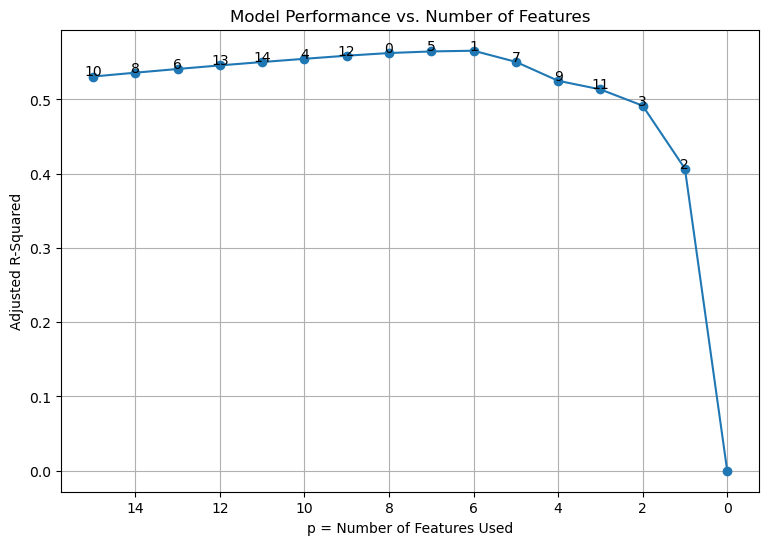

In [ ]:
if __name__ == "__main__":
    plot_adjusted_r_2(ranking, skill_columns)